In [1]:
import pymongo
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
mongo_connection = pymongo.MongoClient("localhost", 27017)
news_aggreg = mongo_connection.tiger.documents
# Loading our whole database to
bundle_list = list(
    news_aggreg.aggregate([
            {"$match" : {"yandexTranslationBody" : {"$exists" : True}}}
        ],allowDiskUse=True)
)

In [4]:
# Let's get the string for our titles and texts
str_text = ""
str_title = ""
for doc in bundle_list:
    str_text += doc["yandexTranslationBody"]
    str_title += doc["yandexTranslationTitle"]

In [ ]:
# Wordcloud for our documents

wordcloud = WordCloud().generate(str_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

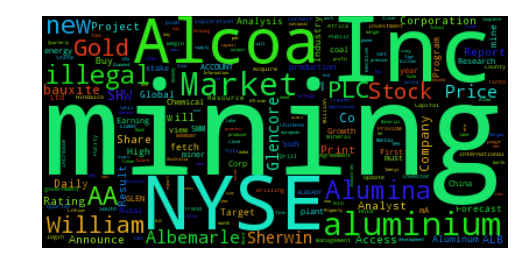

In [6]:
words = WordCloud().generate(str_title)
plt.imshow(words)
plt.axis("off")
plt.show()